# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

$$f(x) = a + b * x^n$$

to some cubic data with noise.

In [23]:
% matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

## Some helper functions
The following functions will generate data and polynomial values.

In [24]:
def polynomials(X, degree=1):
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [25]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [26]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data for the formula below
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4$.

('Coefficients: \n', array([-0.61464097]))
Variance score: 0.16
Residual sum of squares: 0.86
Bias: 0.714521371299
Variance: 0.135302619026


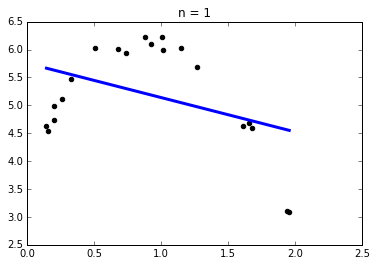

('Coefficients: \n', array([-0.45701825]))
Variance score: 0.37
Residual sum of squares: 0.86
Bias: 0.528555355692
Variance: 0.321268634633


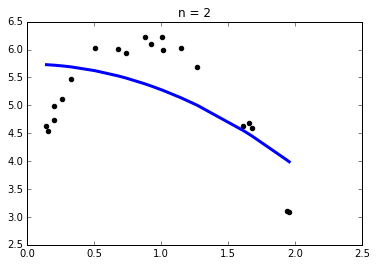

('Coefficients: \n', array([-0.28136423]))
Variance score: 0.53
Residual sum of squares: 0.86
Bias: 0.398235536553
Variance: 0.451588453772


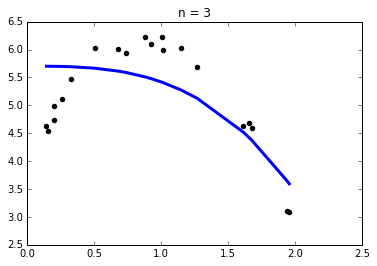

('Coefficients: \n', array([-0.15859421]))
Variance score: 0.61
Residual sum of squares: 0.86
Bias: 0.325418055716
Variance: 0.524405934609


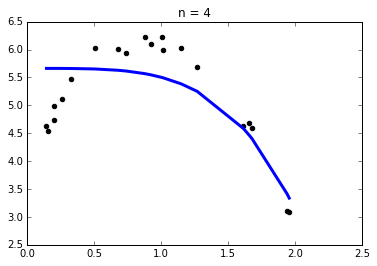

('Coefficients: \n', array([-0.08575687]))
Variance score: 0.65
Residual sum of squares: 0.86
Bias: 0.288361537419
Variance: 0.561462452906


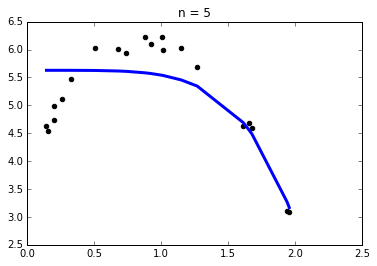

('Coefficients: \n', array([-0.04531688]))
Variance score: 0.67
Residual sum of squares: 0.86
Bias: 0.272093849991
Variance: 0.577730140334


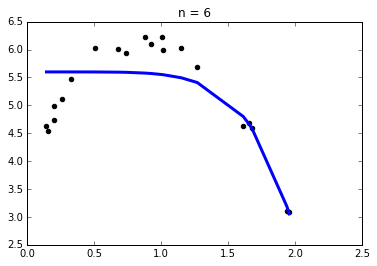

('Coefficients: \n', array([-0.02360782]))
Variance score: 0.68
Residual sum of squares: 0.86
Bias: 0.267867717383
Variance: 0.581956272942


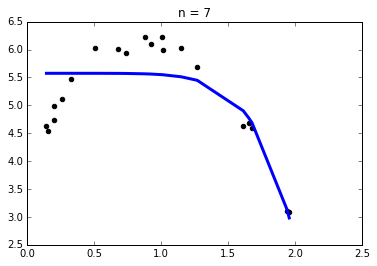

('Coefficients: \n', array([-0.01218535]))
Variance score: 0.67
Residual sum of squares: 0.86
Bias: 0.270498225382
Variance: 0.579325764942


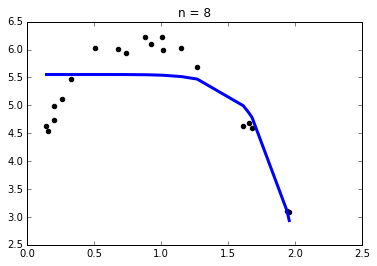

('Coefficients: \n', array([-0.00625213]))
Variance score: 0.67
Residual sum of squares: 0.86
Bias: 0.276830970967
Variance: 0.572993019358


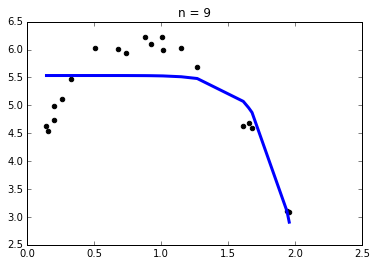

In [27]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])


for i in range(1, 10):
    X = monomials(domain, i) 
    # Create linear regression object and fit it to X and Y
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat)-Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to note that the true measures of bias and variance are averaged over many fits to many samples from the same data source, and we're only looking at one instance here. Notice that the bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

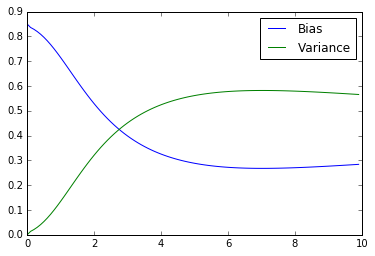

In [31]:
bs = [] #list of biases
vars_ = [] #list of variances
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
    
    # Calculate statistics
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat)-Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    bs.append(bias)
    vars_.append(var)

#Plot the variance and bias
plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars_, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what changes when compared to the code above?

('Coefficients: \n', array([-0.61464097]))
Variance score: 0.16
Residual sum of squares: 0.86
Bias: 0.714521371299
Variance: 0.135302619026


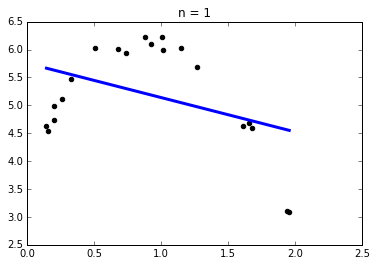

('Coefficients: \n', array([ 4.8471279 , -2.72179195]))
Variance score: 0.98
Residual sum of squares: 0.86
Bias: 0.00350641856085
Variance: 0.846317571764


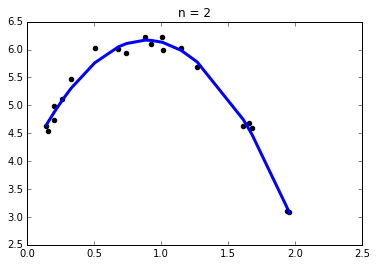

('Coefficients: \n', array([ 5.19858901, -3.15155482,  0.13983126]))
Variance score: 0.98
Residual sum of squares: 0.86
Bias: 0.00319412149625
Variance: 0.846629868829


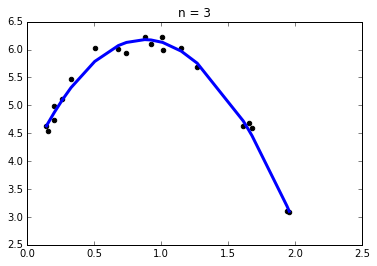

('Coefficients: \n', array([ 7.82979353, -8.25354939,  3.7611355 , -0.84911728]))
Variance score: 0.99
Residual sum of squares: 0.86
Bias: 0.000372293067938
Variance: 0.849451697257


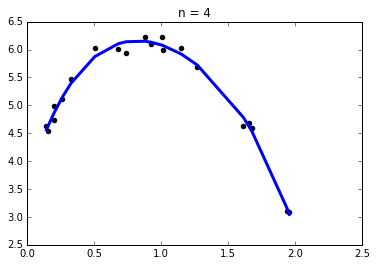

('Coefficients: \n', array([ 10.30147233, -15.46378315,  12.50283077,  -5.47482716,   0.88419278]))
Variance score: 0.99
Residual sum of squares: 0.86
Bias: -8.64705695952e-05
Variance: 0.849910460894


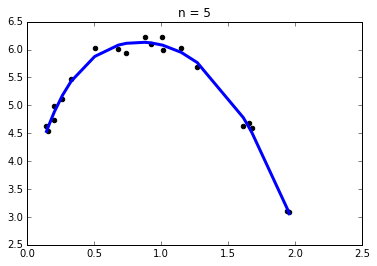

('Coefficients: \n', array([ 12.29060737, -23.5295679 ,  27.22047393, -18.71416816,
         6.60470497,  -0.94642491]))
Variance score: 0.99
Residual sum of squares: 0.86
Bias: -0.000150848760916
Variance: 0.849974839086


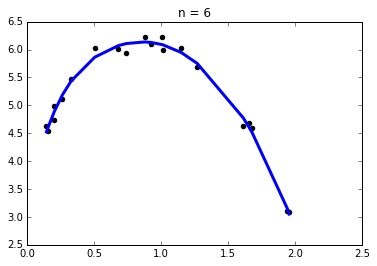

('Coefficients: \n', array([  -8.72277682,   83.34567636, -232.51705698,  316.71542185,
       -229.0072079 ,   83.84068449,  -12.21429081]))
Variance score: 0.99
Residual sum of squares: 0.86
Bias: -0.00202329134832
Variance: 0.851847281673


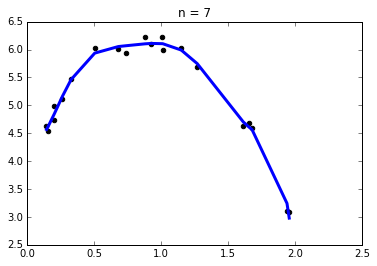

('Coefficients: \n', array([  -47.94591499,   314.58831127,  -912.27096474,  1432.00968421,
       -1296.27969674,   674.85739552,  -187.51679002,    21.528955  ]))
Variance score: 0.99
Residual sum of squares: 0.86
Bias: -0.00381434043394
Variance: 0.853638330759


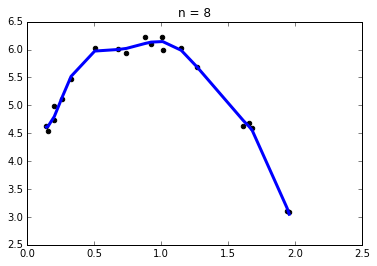

('Coefficients: \n', array([    4.49634336,   -47.41625284,   380.10532862, -1236.87904876,
        2059.5956245 , -1927.85479662,  1026.06319503,  -289.93986289,
          33.77570089]))
Variance score: 0.99
Residual sum of squares: 0.86
Bias: -0.00456743858304
Variance: 0.854391428908


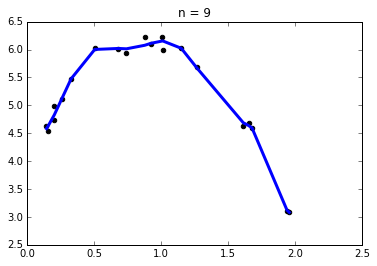

In [33]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat)-Y)**2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

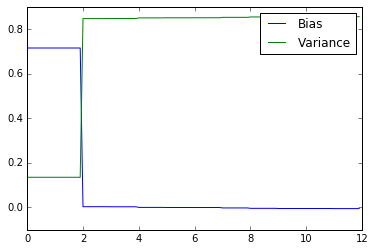

In [32]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

# Guided Practice

We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investiage the bias and variance as the data source changes in complexity

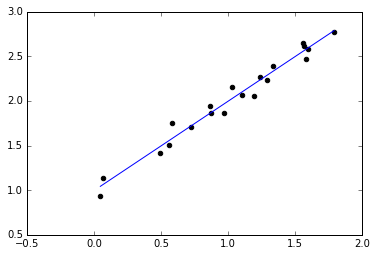

('Coefficients: \n', array([ 0.99934719]))
Variance score: 0.97
Residual sum of squares: 0.25
Bias: -0.00303196316185
Variance: 0.238127293724


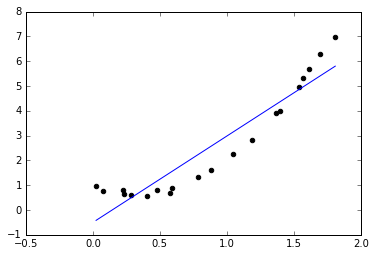

('Coefficients: \n', array([ 3.48167245]))
Variance score: 0.88
Residual sum of squares: 4.65
Bias: 0.535869579331
Variance: 4.10143851784


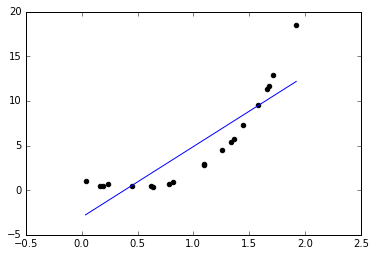

('Coefficients: \n', array([ 7.91260114]))
Variance score: 0.77
Residual sum of squares: 27.00
Bias: 6.21098187751
Variance: 20.7825115605


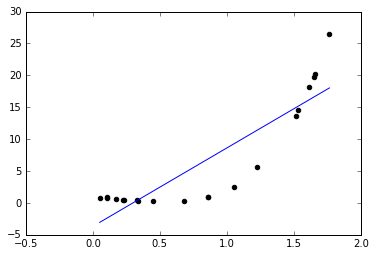

('Coefficients: \n', array([ 12.29006884]))
Variance score: 0.78
Residual sum of squares: 72.38
Bias: 15.7547614639
Variance: 56.6141623477


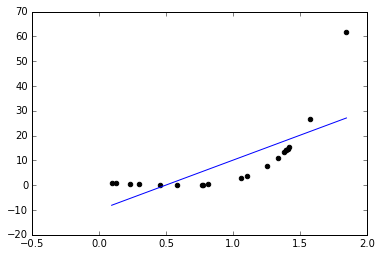

('Coefficients: \n', array([ 20.07994167]))
Variance score: 0.54
Residual sum of squares: 197.77
Bias: 91.032805064
Variance: 106.724369743


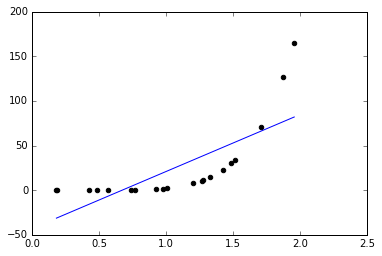

('Coefficients: \n', array([ 63.79543785]))
Variance score: 0.56
Residual sum of squares: 1945.53
Bias: 863.972381719
Variance: 1081.54697577


In [41]:
for i in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** i + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
   
    # Computer the errors
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat)-Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01

    # Plot outputs
    plt.scatter(domain, Y, color = 'black')
    plt.plot(domain, regr.predict(X), color = 'blue')
    ax = plt.gca()
    
    plt.show()
    
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        

# Advanced Exercises

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

('Coefficients: \n', array([-0.31547835]))
Variance score: 0.62
Residual sum of squares: 0.49
Bias: 0.175940431806
Variance: 0.301506868094


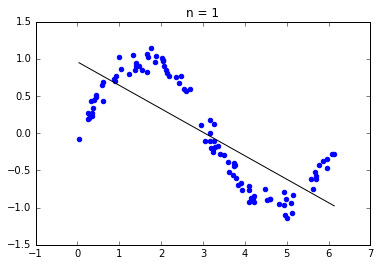

('Coefficients: \n', array([-0.21355065, -0.01687427]))
Variance score: 0.62
Residual sum of squares: 0.49
Bias: 0.173602213944
Variance: 0.303845085957


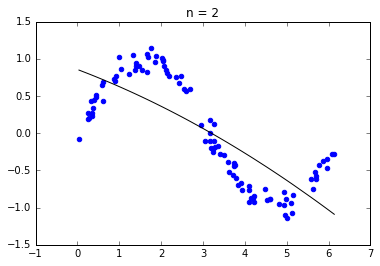

('Coefficients: \n', array([ 1.96761182, -0.89634458,  0.09458176]))
Variance score: 0.97
Residual sum of squares: 0.49
Bias: 0.00274211136116
Variance: 0.474705188539


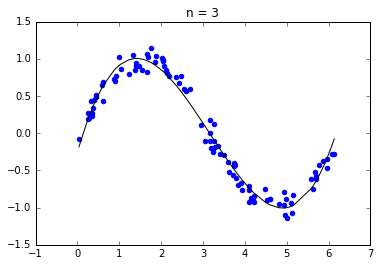

('Coefficients: \n', array([  2.01931585e+00,  -9.33792392e-01,   1.04024149e-01,
        -7.66082182e-04]))
Variance score: 0.97
Residual sum of squares: 0.49
Bias: 0.00271831066411
Variance: 0.474728989236


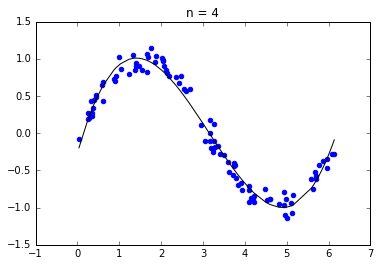

('Coefficients: \n', array([ 0.88064125,  0.28788514, -0.40745415,  0.09072309, -0.0058594 ]))
Variance score: 0.98
Residual sum of squares: 0.49
Bias: -0.000510317225179
Variance: 0.477957617125


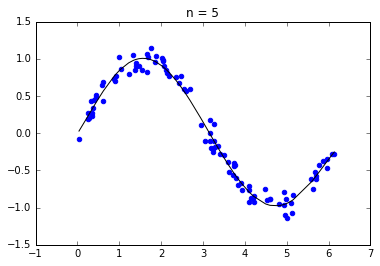

('Coefficients: \n', array([  1.01439676e+00,   8.46309244e-02,  -2.78801443e-01,
         5.19628967e-02,  -3.42638732e-04,  -2.98305778e-04]))
Variance score: 0.98
Residual sum of squares: 0.49
Bias: -0.00053233938785
Variance: 0.477979639288


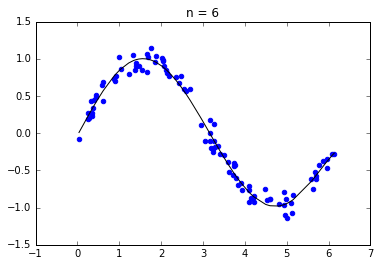

('Coefficients: \n', array([  1.68371039e+00,  -1.30255253e+00,   9.43459816e-01,
        -4.86084388e-01,   1.24194365e-01,  -1.47904330e-02,
         6.68222268e-04]))
Variance score: 0.98
Residual sum of squares: 0.49
Bias: -0.000826795085086
Variance: 0.478274094985


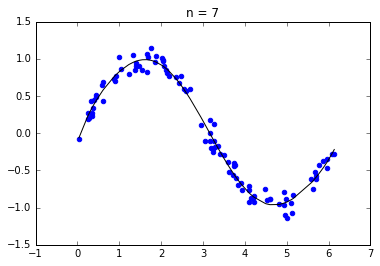

('Coefficients: \n', array([  2.63314661e+00,  -3.94449204e+00,   4.07813751e+00,
        -2.39357537e+00,   7.68249371e-01,  -1.36728265e-01,
         1.27776521e-02,  -4.90803172e-04]))
Variance score: 0.98
Residual sum of squares: 0.49
Bias: -0.00120832711404
Variance: 0.478655627014


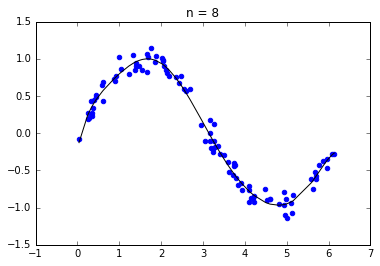

('Coefficients: \n', array([  1.57032813e+00,  -6.37279405e-02,  -1.90583917e+00,
         2.39988123e+00,  -1.42929458e+00,   4.61569261e-01,
        -8.28116494e-02,   7.78187580e-03,  -2.99202141e-04]))
Variance score: 0.98
Residual sum of squares: 0.49
Bias: -0.00147334065293
Variance: 0.478920640553


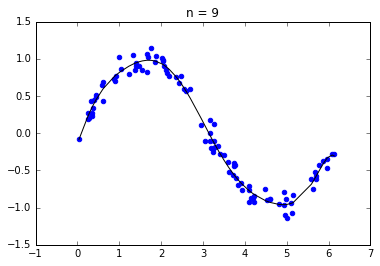

In [47]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    # pass
    # Fit a polynomial of degree i to the data
    X = polynomials(domain,i)
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat)- Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # Compute the errors
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))

    # Plot outputs
    plt.scatter(domain, Y, color = "blue")
    plt.plot(domain, regr.predict(X), color = 'black')
    
    plt.title("n = " + str(i))

    plt.show()

### Repeat the same exercise with the function

$$ y = e^x $$

You should again find that larger polynomials fit the data better.


('Coefficients: \n', array([ 59.17310664]))
Variance score: 0.65
Residual sum of squares: 17466.56
Bias: 6171.08115137
Variance: 11295.4643154


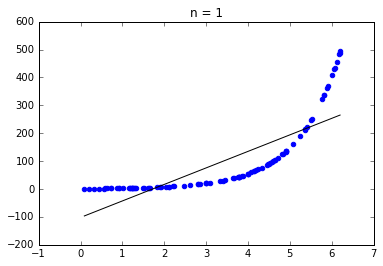

('Coefficients: \n', array([-107.73788779,   25.83753452]))
Variance score: 0.94
Residual sum of squares: 17466.56
Bias: 1044.38400435
Variance: 16422.1614624


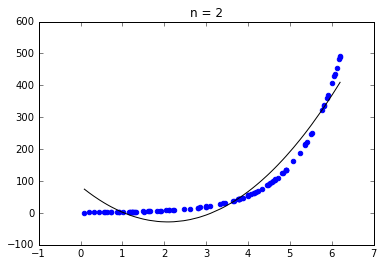

('Coefficients: \n', array([ 78.64775072, -41.81450485,   6.79025433]))
Variance score: 0.99
Residual sum of squares: 17466.56
Bias: 120.481958937
Variance: 17346.0635078


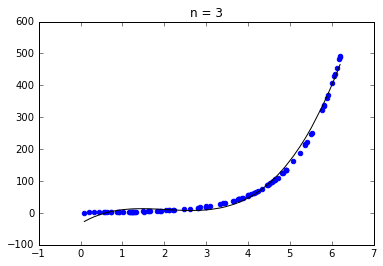

('Coefficients: \n', array([-41.15421283,  39.46723489, -12.81317031,   1.53216178]))
Variance score: 1.00
Residual sum of squares: 17466.56
Bias: 9.69870609977
Variance: 17456.8467607


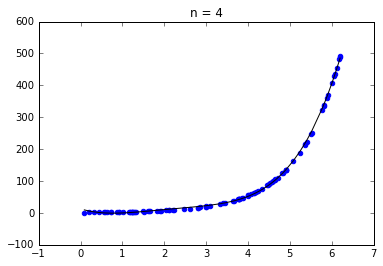

('Coefficients: \n', array([ 19.28308329, -23.94474762,  13.2453074 ,  -3.04021955,   0.28709192]))
Variance score: 1.00
Residual sum of squares: 17466.56
Bias: 0.575924438812
Variance: 17465.9695423


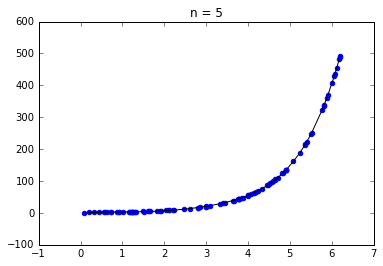

('Coefficients: \n', array([ -4.68832029,  11.22149541,  -8.22531366,   3.20692919,
        -0.57350941,   0.04514382]))
Variance score: 1.00
Residual sum of squares: 17466.56
Bias: 0.0258837652311
Variance: 17466.519583


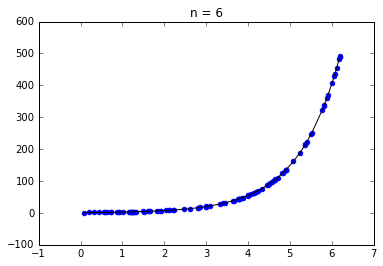

('Coefficients: \n', array([ 3.26569605, -4.23029203,  4.74768102, -2.29546967,  0.66141788,
       -0.09473642,  0.00629384]))
Variance score: 1.00
Residual sum of squares: 17466.56
Bias: -0.000843633197073
Variance: 17466.5463104


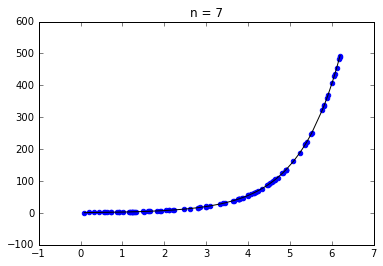

('Coefficients: \n', array([  3.27049542e+00,  -4.24229349e+00,   4.76094334e+00,
        -2.30313503e+00,   6.63902954e-01,  -9.51912020e-02,
         6.33769902e-03,  -1.73156066e-06]))
Variance score: 1.00
Residual sum of squares: 17466.56
Bias: -0.000843627525464
Variance: 17466.5463104


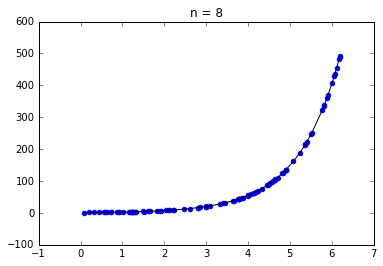

('Coefficients: \n', array([  4.55144045e+00,  -8.17547660e+00,   1.01968350e+01,
        -6.33801379e+00,   2.41004423e+00,  -5.49062042e-01,
         7.60874565e-02,  -5.83866190e-03,   2.04927272e-04]))
Variance score: 1.00
Residual sum of squares: 17466.56
Bias: -0.000992001421546
Variance: 17466.5464588


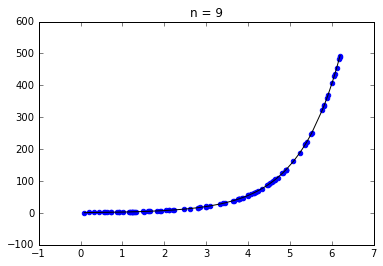

In [48]:
import math
f = lambda x: math.exp(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    # pass
    # Fit a polynomial of degree i to the data
    X = polynomials(domain,i)
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat)- Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # Compute the errors
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))

    # Plot outputs
    plt.scatter(domain, Y, color = "blue")
    plt.plot(domain, regr.predict(X), color = 'black')
    
    plt.title("n = " + str(i))

    plt.show()

### A bad model for the exponential

To see a model with high variance, try fitting the model:

```
y = a sin(x) + b cos(x)
```

to `y = e^x`. Does this model have more bias or variance?